In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.2
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [4]:
# layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100, input_shape=(None, 5)) #input_shape我们往往第一层指定
# layer是输入为5，输出为100的全连接层，所以对于输入为10x5的矩阵来看，会乘以一个5x100的矩阵，所以输出就是10x100.
print(type(layer))
layer(tf.ones([10, 5]))  #这里是对应层的输出

<class 'tensorflow.python.keras.layers.core.Dense'>


<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[-0.3904066 ,  0.22859843, -0.25498265, -0.7651228 ,  0.03871866,
        -0.39150342, -0.20441823, -0.38054898, -0.38179123,  0.24651799,
        -0.19441265,  0.13843875, -0.28411508, -0.17925887, -0.06169839,
         0.04723501,  0.32234234,  0.08548264, -0.55391103,  0.49972832,
         0.15001802,  0.65794814,  0.00424267, -0.23956777,  0.20541587,
         0.21248586, -0.17432491,  0.21736139,  0.12918372,  0.31631464,
        -0.02029517,  0.34390035,  0.02670021, -0.02868249, -0.16652723,
         0.06954511,  0.10300954, -0.00084993, -0.2602939 ,  0.08286771,
        -0.08524662,  0.1760346 ,  0.06691934, -0.21306601, -0.07141295,
        -0.1545725 ,  0.2185468 , -0.11665167, -0.00710624, -0.3453395 ,
         0.11962595,  0.15074922,  0.4001224 ,  0.4982316 , -0.43518215,
         0.14501643,  0.2521278 , -0.07149097, -0.41051775,  0.04369852,
         0.5302565 , -0.36095947, -0.06976266,  0.25864732, -0.02835645,


In [5]:
#layer.variables 可以打印layer里包含的所有参数
# x * w + b  w就是指层的参数，kernel就是w，b就是bias
print(layer.variables)
print('-'*50)
#获得所有可训练的变量
layer.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(5, 100) dtype=float32, numpy=
array([[-0.20975728,  0.03265993,  0.06522904, -0.20984414, -0.00621092,
        -0.23530573,  0.01311578, -0.03444642, -0.05204447,  0.16179283,
        -0.22277601, -0.10389762, -0.09877971, -0.1878957 ,  0.2242323 ,
         0.09294038,  0.14984329,  0.13888104, -0.23878771, -0.0319422 ,
         0.02572347,  0.2376935 ,  0.2119547 ,  0.06043269,  0.11092116,
        -0.01119331, -0.05633678, -0.04576841,  0.01130398, -0.07271045,
         0.21966185, -0.07518132, -0.1944198 , -0.01122048, -0.09321725,
         0.02563451, -0.03454411,  0.1748238 , -0.16180256,  0.17601545,
        -0.23319598,  0.13793667, -0.23144817,  0.08204933, -0.22265883,
        -0.13693711,  0.21995725, -0.03853567, -0.00528194,  0.13249399,
         0.19250666,  0.14234866, -0.00319822,  0.18204947, -0.1530782 ,
         0.18761204, -0.2314876 ,  0.02296321, -0.19378877,  0.12946026,
         0.06232755, -0.20962448, -0.12448068,  0.190984

[<tf.Variable 'dense/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[-0.20975728,  0.03265993,  0.06522904, -0.20984414, -0.00621092,
         -0.23530573,  0.01311578, -0.03444642, -0.05204447,  0.16179283,
         -0.22277601, -0.10389762, -0.09877971, -0.1878957 ,  0.2242323 ,
          0.09294038,  0.14984329,  0.13888104, -0.23878771, -0.0319422 ,
          0.02572347,  0.2376935 ,  0.2119547 ,  0.06043269,  0.11092116,
         -0.01119331, -0.05633678, -0.04576841,  0.01130398, -0.07271045,
          0.21966185, -0.07518132, -0.1944198 , -0.01122048, -0.09321725,
          0.02563451, -0.03454411,  0.1748238 , -0.16180256,  0.17601545,
         -0.23319598,  0.13793667, -0.23144817,  0.08204933, -0.22265883,
         -0.13693711,  0.21995725, -0.03853567, -0.00528194,  0.13249399,
          0.19250666,  0.14234866, -0.00319822,  0.18204947, -0.1530782 ,
          0.18761204, -0.2314876 ,  0.02296321, -0.19378877,  0.12946026,
          0.06232755, -0.20962448, -0.124480

In [6]:
# help(layer)

In [7]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [8]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [10]:
np.log(1+np.exp(0))

0.6931471805599453

In [18]:
# 自己设计一个激活函数
# 只需要调用Lambda然后使用lamba，一行代码就可以创建一个自己的激活函数
# tf.nn.softplus : log(1+e^x)
customized_softplus = keras.layers.Lambda(lambda x : tf.math.log(1+tf.math.exp(x)))
print(customized_softplus([-10., -5., 0., 5., 10.]))
# 也可以用下面这个方法
# def scaled_elu(z, scale=1.0, alpha=1.0):
#     # z >= 0 ? scale * z : scale * alpha * tf.nn.elu(z)
#     # 是不是大于等于0
#     is_positive = tf.greater_equal(z, 0.0)
# #     return scale * tf.where(is_positive, z, alpha * tf.nn.elu(z))
#     return scale * tf.where(is_positive, z, alpha * (tf.math.exp(z)-1))
# customized_softplus = keras.layers.Lambda(scaled_elu)
# print(customized_softplus([-10., -5., 0., 5., 10.]))


tf.Tensor([-0.9999546  -0.99326205  0.          5.         10.        ], shape=(5,), dtype=float32)


In [12]:
np.log(1+np.exp(-5))

0.006715348489117967

In [17]:
# customized dense layer.
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        # keras.layers.Activation(activation)会返回一个已经定义的激活函数地址
        self.activation = keras.layers.Activation(activation)  #直接使用tf提供的
        super(CustomizedDenseLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        """构建所需要的参数，也就是kernel(也就是w)还有bias"""
        # x * w + b. input_shape:[None, a] w:[a,b]output_shape: [None, b]
        print('-'*50)
        print(input_shape)
        # add_weight是父类方法
        # 要记住其实wx都是矩阵运算
        self.kernel = self.add_weight(name = 'kernel',
                                      shape = (input_shape[1], self.units),  # units是这一层的神经元个数
                                      initializer = 'uniform',#使用均匀分布的方法去初始化kernel
                                      trainable = True)#这里如果为False那么这一层的参数就被冻住了，不训练
        self.bias = self.add_weight(name = 'bias',
                                    shape = (self.units, ),
                                    initializer = 'zeros',
                                    trainable = True)
        # fit方法就在build的父类里面
        super(CustomizedDenseLayer, self).build(input_shape)
    
    def call(self, x):
        """完成正向计算"""
        # 进行激活
        # 这里是一次性训练一个batch_size的数据（默认32个）矩阵运算
        # build的父类会自动来调call
        return self.activation(x @ self.kernel + self.bias)

#完全模仿dense来实现自定义层，因此input_shape传的和dense一致，只需要是特征数，
# 父类Layer自动会转为二维的input_shape，然后再传递给build
model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu',
                         input_shape=x_train.shape[1:]),  #这里传入的是特征数
#     CustomizedDenseLayer(1),
    #再加一个激活函数层，这个和下面注释的两行等价的
#     customized_softplus,
#     一般其实回归的最后输出层是没有激活函数的，这里只是为了演示
    CustomizedDenseLayer(1,activation=customized_softplus),
#     keras.layers.Dense(1, activation="softplus"),  #一层
#     keras.layers.Dense(1), keras.layers.Activation('softplus'), #两层
])
model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]

--------------------------------------------------
(None, 8)
--------------------------------------------------
(None, 30)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_2 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_3 (Cu (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 10,
                    callbacks = callbacks)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.2125 - val_loss: 0.6734
Epoch 2/10
36

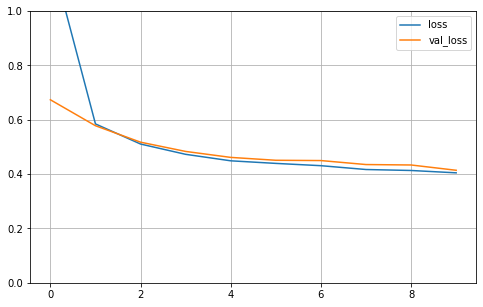

In [15]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [16]:
model.evaluate(x_test_scaled, y_test, verbose=0)

0.4134902358055115